Output()

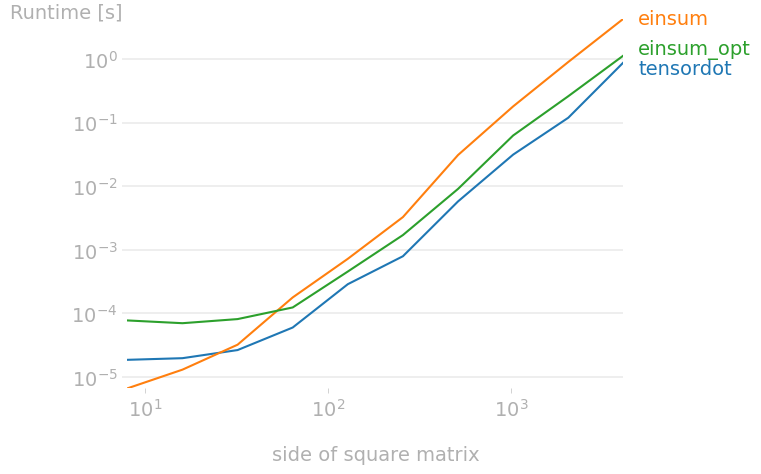

In [1]:
import numpy as np

import perfplot


def tensordot(a, b):
    return np.tensordot(a, b, axes=1)


def einsum(a, b):
    return np.einsum('ij,jkl->ikl', a, b)


def einsum_opt(a, b):
    return np.einsum('ij,jkl->ikl', a, b, optimize=True)


rng = np.random.default_rng(0)
a1 = rng.uniform(low=0, high=1, size=(10, 10))
a2 = rng.uniform(low=0, high=1, size=(10, 20, 30))
for f in [tensordot, einsum, einsum_opt]:
    print(f(a1, a2).shape)

perfplot.show(
    setup=lambda n: (
        rng.uniform(low=0, high=1, size=(10, 10)),
        rng.uniform(low=0, high=1, size=(10, n, n)),
    ),
    kernels=[tensordot, einsum, einsum_opt],
    n_range=[2 ** k for k in range(3, 13)],
    xlabel="side of square matrix",
    logy=True
)
